<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(visualizing_loss_functions.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

### Visualizing Loss Functions

### Lab Objectives:   
- Learn about Regression and Classification Losses
- Visualize these losses   
- Understand the role the loss function plays in machine learning   
- Learn that there are many choices of losses depending on the problem you are attempting to solve  
- Understand that the loss is a single value   
- Understand the loss measures how well the model is performing   


### Step 1:   

### Regression losses

In [1]:
# Import some libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let us create some fake targets/y_true/labels
# We also assume our target is y_true = 1
y_true = np.repeat(a=1, repeats=100)
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

With our target in place, we would pass our features through the model to make predictions. Those predictions in this case will represent a scalar value. Rather than creating a mdoel, we will assume our predictions are values between -10 and 10. Because we have 100 y_true, we create 100 samples for our predictions.  

In [3]:
# It is ok for us to simulate this activity like we are doing here.
y_pred = np.linspace(-10, 10, 100)
y_pred[:10]

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818])

Before going forward, let's ensure we understand that we will be calculating the loss on individual samples not a batch. Hence, while I may call the function MSE (Mean Squared Error) or MAE (Mean Absolute Error), etc., we will not be calculating the mean across the batch but instead the loss on a single example.

To help with the understanding, let's use scikit-learn's built in metrics function   


### Step 2:  
Setup the Mean Squared Error Loss

In [4]:
# Import sklearn's metrics 
from sklearn import metrics

### Mean Squared Error (MSE)

In [5]:
# As seen below, the MSE reduces the loss between these two arrays to a single value
metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

35.006734006734

In [6]:
# We can define our own function to do the same
# This reduces the loss to a single value
def mse_loss(y_true=None, y_pred=None):
    return np.sum((y_true - y_pred)**2) / y_pred.shape[0]

# Call the function
mse_loss(y_true=y_true, y_pred=y_pred)

np.float64(35.006734006734)

In [7]:
# Rather than finding mean, let's just take the squared error for each sample
# I still call it MSE here just to keep things simple
def mse_loss(y_true=None, y_pred=None):
    return (y_true - y_pred)**2

In [8]:
# Create a function to visualize the loss
def plot_loss(loss_fn='', y_pred=y_pred, loss_result=None, title=''):
    print(f'Plotting {loss_fn} loss function: {loss_fn}')
    plt.figure(figsize=(5,4))
    plt.title(label=f'{loss_fn} Loss vs Predicted values')
    plt.plot(y_pred, loss_result, label=loss_fn)
    plt.vlines(x=1, ymin=-0, ymax=max(loss_result), colors='r', label='y_true=1')
    plt.xlabel(xlabel='Predicted values')
    plt.ylabel(ylabel='Loss')
    plt.legend()
    plt.grid(visible=True, which='both', axis='both')
    plt.show()


Plotting MSE loss function: MSE


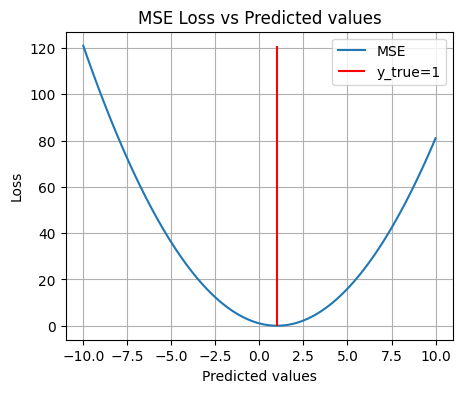

In [9]:
# Calculate the squared loss for the prediction and target above
# Remember this is being looked at from a single sample perspective and not the entire batch
# We are going through each predictions and calculating the loss for that prediction vs its actual target
mse_loss_result = [ mse_loss(y_true=y_true[i], y_pred=y_pred[i]) for i in range(len(y_pred))]

# Call the loss function and plot it
plot_loss(loss_fn='MSE', y_pred=y_pred, loss_result=mse_loss_result)

Above shows as expected, as our predicted values gets close to our target we see the loss comes closer to 0. As we move away from our target y_true=1 on both the negative and positive sides, the loss increases. The objective is to get the loss to 0 or close to 0 as possible. Do keep in mind, in the real world, a model with 0 loss is probably a model that may not generalize well in production. However, we would like this value to be as low as possible.

The *squared loss* for each sample works for our problem because we wanted just the loss on an individual sample. If we wanted the loss across the batch, then we would calculate the mean squared error across the batch ;-)


### Step 3:  
Setup the RMSE looss  

### RMSE 
While we are here, let's look at the RMSE. The RMSE is simply the square root of the results from the MSE  

In [10]:
# Once again, working with single examples rather than the entire batch
# Notice we are leveraging the mse_loss function that was created earlier.
# More importantly, we are taking the square root by using **.5
def rmse(y_true=None, y_pred=None):
    return [ (mse_loss(y_true[i], y_pred[i]))**.5 for i in range(len(y_pred))]

Plotting RMSE loss function: RMSE


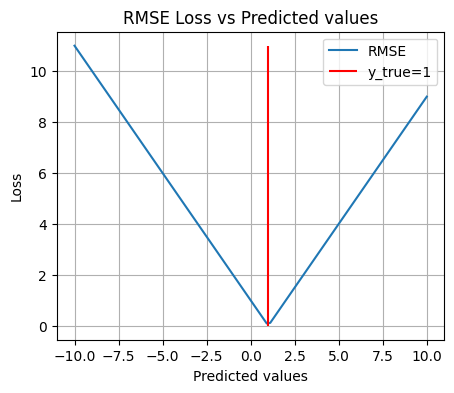

In [11]:
# Call the function
rmse_loss_result = rmse(y_true=y_true, y_pred=y_pred)
plot_loss(loss_fn='RMSE', y_pred=y_pred, loss_result=rmse_loss_result)

Once again, we see the loss is basically 0, as we get closer to y_true.   

### Step 4:   
Setup the Mean Absolute Value (MAE) Loss    

### Mean Absolute Value (MAE) Loss 
- This loss takes the mean absolute value for the difference between the predicted value and the true value. Once again, if we use the MAE loss, we will get a single value, so we will not calculate the mean

In [12]:
# As always, the loss is a single value. 
# When working with the batch, we get the mean absolute error
metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

5.1

In [13]:
# We simply one the absolute error here for each sample
# Same as previously discussed
def mae_loss(y_true=None, y_pred=None):
    # If we want the true MAE uncomment the line below
    #return np.mean(abs(y_true - y_pred))
    return abs(y_true - y_pred)

Plotting MAE loss function: MAE


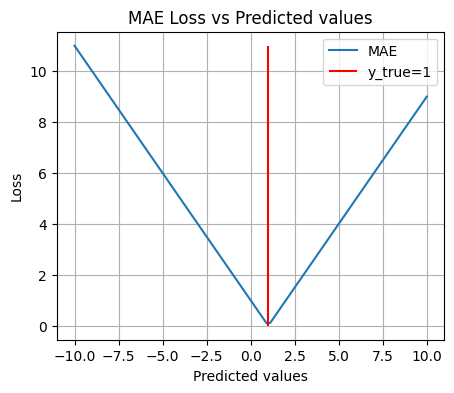

In [14]:
# Call the function
mae_loss_result = mae_loss(y_true=y_true, y_pred=y_pred)

# plot the MAE loss
plot_loss(loss_fn='MAE', y_pred=y_pred, loss_result=mae_loss_result)

Oh oh! If we look at the RMSE and the MAE loss, the look almost the same. This is as a result of the dataset we used as our predictions. Our dataset is a contrived set of linearly spaced values. Which means there is no outlier or any such things. MAE works best when there are outliers in the dataset. In this case, we do not have any.

Also for any one sample, the loss for the RMSE and the MAE are likely to be exactly the same. Hence the reason for the diagrams we see above. 

In [15]:
# Take the first sample from the dataset and its prediction to see how the two results are the same
metrics.mean_absolute_error(y_true[:1], y_pred[:1]), metrics.root_mean_squared_error(y_true[:1], y_pred[:1])

(11.0, 11.0)

In [16]:
# Verifying with another example
metrics.mean_absolute_error(y_true[[10]], y_pred[[10]]), metrics.root_mean_squared_error(y_true[[10]], y_pred[[10]])

(8.97979797979798, 8.97979797979798)

### Step 5:   
Setup the Log-Cosh Loss   


###  Log-Cosh Loss    
Where as the losses above leveraged the mean, the Log-Cosh tends to prefer solutions in the median rather than the mean. Because the median is strongly influenced by outliers and the median is not, Log-Cosh is considered to be a robust estimator.   
*Statistical Properties of the log-cosh Loss Function Used in Machine Learning*: https://arxiv.org/pdf/2208.04564

In [17]:
# Define the Log-Cosh loss
def log_cosh_loss(y_true, y_pred):
    return [ np.log(np.cosh(y_pred[i] - y_true[i])) for i in range(len(y_pred))]

Plotting Log-Cosh loss function: Log-Cosh


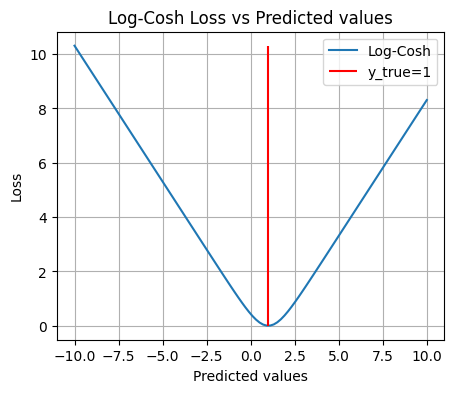

In [18]:
log_cosh_loss_result = log_cosh_loss(y_true=y_true, y_pred=y_pred)
plot_loss(loss_fn='Log-Cosh', y_pred=y_pred, loss_result=log_cosh_loss_result)

Once again, the takeaway you need to have is that as our predicted values gets to our target, the loss is 0.  
Note there are many other loss functions out there. The objective here is only to make you aware what the loss function do.   


### Step 6:  
Wrapping this up with the Huber Loss   

In [19]:
# Define the huber loss function
def huber_loss(y_true, y_pred, delta=1.):

    # Calculate the error
    error = y_true - y_pred

    # Check to see if the error is smaller than delta
    is_small_error= np.abs(error) <= delta

    # Calculate the squared error loss
    # The 0.5 is being used for mathematical convenience when calculating derivatives.
    squared_error_loss = 0.5 * (error**2)

    # Calculate the linear loss
    linear_loss = delta * (np.abs(error)- .5 * delta)

    # Use the squared_error_loss or linear_loss based on the size of error    
    # If the error is less than delta use the squared_error_loss, else linear_loss 
    return np.where(is_small_error, squared_error_loss, linear_loss)



In [20]:
# Call the function against for the y_true and the predictions
huber_loss = huber_loss(y_true=y_true, y_pred=y_pred, delta=1.)


Plotting Huber Loss loss function: Huber Loss


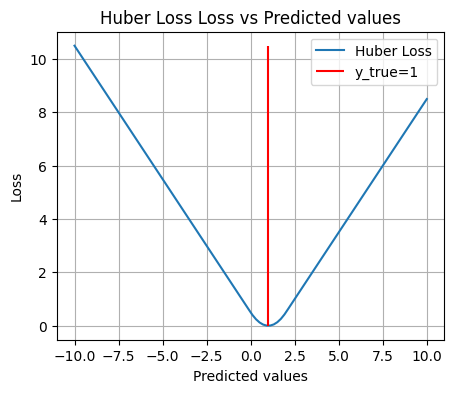

In [21]:
# Plot the huber loss
plot_loss(loss_fn='Huber Loss', y_pred=y_pred, loss_result=huber_loss)

### Step 7:  
Transition to classification loss   

## Classification loss 
### Crossentropy Loss   
The Crossentropy loss is what you are more likely to use on most days. Whether this is Binary Crossentropy for binary classification problem, categorical crossentropy for multiclass problems where your labels are one-hot encoded or sparse categorical for other multiclass problems. 

In [22]:
# let's create some fake targets/y_true
# Let's assume we have a binary classification problem
# Hence our labels are 0 and 1
y_true = np.array([0, 1])
y_true

array([0, 1])

In [23]:
# Let us now create some fake predictions. Like was done before
# No need for us to get a model on run this against it.
# It is ok for us to simulate this activity like we are doing here.
# I use the value 0.01 rather than 0 to prevent inf
# I use the 0.99 to prevent nans
# This represents our output probability
y_pred = np.linspace(0.01, 0.99, 100)
y_pred[:10]

array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.08919192, 0.09909091])

In [24]:
# Create our own crossentropy loss function
# Keeping this as binary classification 0 or 1
# https://en.wikipedia.org/wiki/Cross-entropy

def binary_crossentropy_loss(y_true=None, y_pred=None):
    #Calculates the binary crossentropy loss

    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [25]:
# Get the BCE Loss when the true label is 1
bce_loss_1 = (binary_crossentropy_loss(y_true=y_true[1], y_pred=y_pred))

# Get the BCE Loss when the true label is 0
bce_loss_0 = (binary_crossentropy_loss(y_true=y_true[0], y_pred=y_pred))

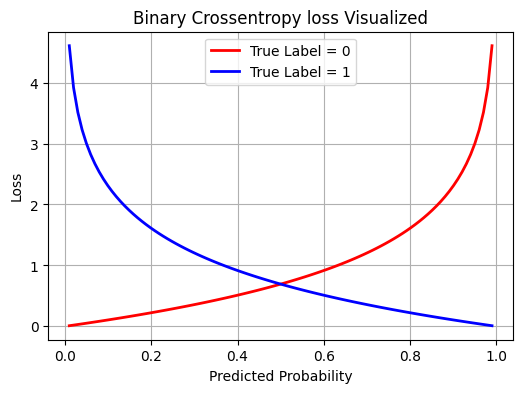

In [26]:
# Visualize the BCE loss
plt.figure(figsize=(6,4))
plt.title(label='Binary Crossentropy loss Visualized')
plt.plot(y_pred, bce_loss_0, label='True Label = 0', c='r', lw=2, ls='-')
plt.plot(y_pred, bce_loss_1, label='True Label = 1', c='b', lw=2, ls='-')
plt.grid('both')
plt.xlabel(xlabel='Predicted Probability')
plt.ylabel('Loss')
plt.legend()
plt.show()

Above, we see that when the true label is 1 and the predicted probability is 0, the loss is very high.  As the predicted probability approaches 1.0 our loss comes closer to 0  

Similarly, we see when the true label is 0 and the predicted probability is 1, we have a high loss.  Again, as the prediction moves closer to 0, we see the loss is begin reduced. 

### Step 8:   
Setup the Hinge Loss   

### Hinge Loss  
While the Crossentropy loss is one you will use often especially in deep learning tasks, you maybe working on a Support Vector Classifier and thus may use the *Hinge Loss* or maybe the *squared hinge loss*    
In SVM the classes are usually -1 and +1. So we will generate a new set of data for this.  

In [27]:
# let's create some fake targets/y_true
# Let's assume we have a binary classification problem
# Hence our labels are 0 and 1
y_true = np.array([-1, 1])
y_true

array([-1,  1])

In [28]:
# Let us now create some fake predictions. Like was done before
# No need for us to get a model on run this against it.
# It is ok for us to simulate this activity like we are doing here.
# This represents our model's output
y_pred = np.linspace(-2, 2, 400)
y_pred[:10]

array([-2.        , -1.98997494, -1.97994987, -1.96992481, -1.95989975,
       -1.94987469, -1.93984962, -1.92982456, -1.9197995 , -1.90977444])

In [29]:
# Define the Hinge Loss function
def hinge_loss(y_true=None, y_pred=None):
    return np.maximum(0, 1 - y_true * y_pred)

In [30]:
# Calculate the negative loss on each sample
neg_loss_result = hinge_loss(y_true=y_true[0], y_pred=y_pred)

# Calculate the positive loss on each sample
pos_loss_result = hinge_loss(y_true=y_true[1], y_pred=y_pred)

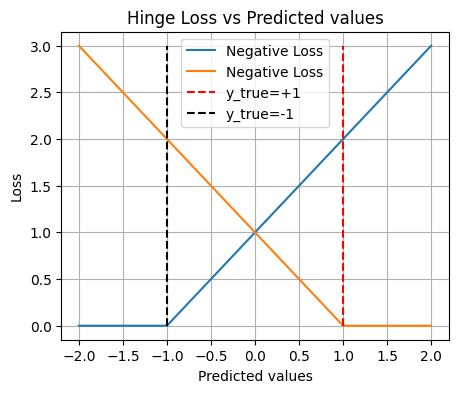

In [ ]:
# Visualize the hinge loss
plt.figure(figsize=(5,4))
plt.title(label=f'Hinge Loss vs Predicted values')
plt.plot(y_pred, neg_loss_result, label='Negative Loss')
plt.plot(y_pred, pos_loss_result, label='Negative Loss')

plt.vlines(x=1, ymin=-0, ymax=max(neg_loss_result), colors='r', ls='--', label='y_true=+1')
plt.vlines(x=-1, ymin=-0, ymax=max(neg_loss_result), colors='k', ls='--', label='y_true=-1')

plt.xlabel(xlabel='Predicted values')
plt.ylabel(ylabel='Loss')
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

What we see above, is that when the true class is +1 and the prediction is greater than 1, then the loss is 0. However, if the true label is +1 and the predicted value is less than +1 then the loss starts to increase the lesser the value is. 

Similarly, when the true value is -1, if the prediction is less than -1, then the loss is 0. However, if the prediction is greater than -1 then the loss starts to increase. In all cases, we would prefer to see a loss close to 1.

A Variant of the Hinge Loss is the Squared Hinge Loss. Let us implement that:   

### Step 9:   
Setup the Squared Hinge Loss

In [32]:
# Define the Hinge Loss function
# We are just taking the square of the prediction
def squared_hinge_loss(y_true=None, y_pred=None):
    return np.maximum(0, 1 - y_true * y_pred)**2

In [33]:
# Calculate the negative loss on each sample
neg_loss_result = squared_hinge_loss(y_true=y_true[0], y_pred=y_pred)

# Calculate the positive loss on each sample
pos_loss_result = squared_hinge_loss(y_true=y_true[1], y_pred=y_pred)



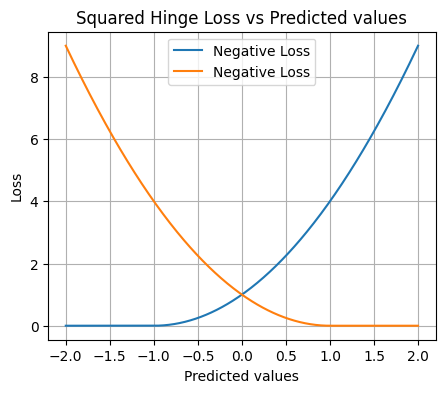

In [34]:
# Plot the squared Hinge Loss
plt.figure(figsize=(5,4))
plt.title(label=f'Squared Hinge Loss vs Predicted values')
plt.plot(y_pred, neg_loss_result, label='Negative Loss')
plt.plot(y_pred, pos_loss_result, label='Negative Loss')

plt.xlabel(xlabel='Predicted values')
plt.ylabel(ylabel='Loss')
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

### That's it for visualizing loss functions! 

### Takeaways   
- We were able to visualize various loss functions   
- We understand that the loss is a single value   
- We saw that we need two vectors, one consisting of the true values and the other the predicted values  
- The loss allows us to understand how far off from the real value the prediction is     

# Additional references:  
- https://www.comet.com/site/blog/5-regression-loss-functions-all-machine-learners-should-know/   
- https://nbviewer.org/github/groverpr/Machine-Learning/blob/master/notebooks/05_Loss_Functions.ipynb   
https://fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers/  
- https://en.wikipedia.org/wiki/Cross-entropy  
- https://arxiv.org/pdf/2307.02694  